In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation

In [96]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1)

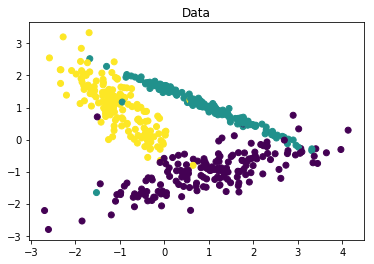

In [97]:
plt.subplot(111)
plt.title("Data")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
def plot_separating_surface(k, flag=0, X=X, y=y):
    global list_of_accuracy
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.2, random_state=42)

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    classifier = KNeighborsClassifier(k)
    classifier.fit(X_train, y_train)
    surface_prediction = np.array(classifier.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    cm = plt.cm.RdBu
    plt.figure(figsize = (16, 6))
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, surface_prediction,
                  alpha=.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)
    print("k = %d" % k)
    print("Train:accuracy=%f" % (metrics.accuracy_score(y_train, classifier.predict(X_train))))
    plt.subplot(1,2,2)
    plt.contourf(xx, yy, surface_prediction,
                  alpha=.4)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test)
    print("Test:accuracy=%f" % (metrics.accuracy_score(y_test, classifier.predict(X_test))))
    list_of_accuracy.append(metrics.accuracy_score(y_test, classifier.predict(X_test)))
    if flag==0: 
        plt.show()

k = 3
Train:accuracy=0.970000
Test:accuracy=0.960000


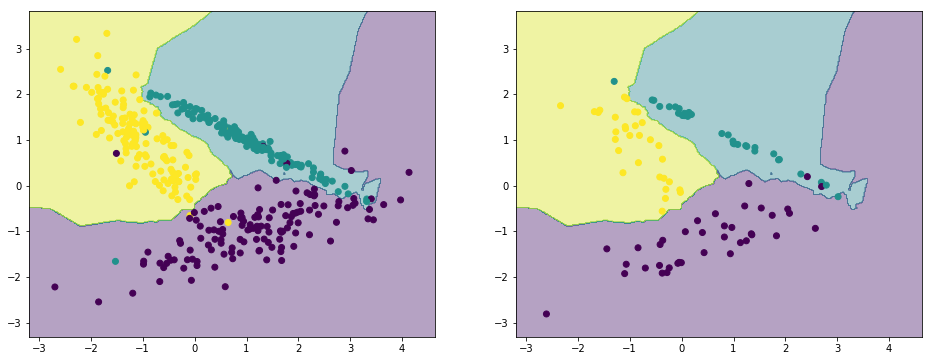

In [99]:
plot_separating_surface(3)

In [100]:
list_of_accuracy = []
for i in range(1,10):
    plot_separating_surface(i, 1)

k = 1
Train:accuracy=1.000000
Test:accuracy=0.940000
k = 2
Train:accuracy=0.967500
Test:accuracy=0.930000
k = 3
Train:accuracy=0.970000
Test:accuracy=0.960000
k = 4
Train:accuracy=0.970000
Test:accuracy=0.940000
k = 5
Train:accuracy=0.965000
Test:accuracy=0.960000
k = 6
Train:accuracy=0.965000
Test:accuracy=0.950000
k = 7
Train:accuracy=0.962500
Test:accuracy=0.960000
k = 8
Train:accuracy=0.960000
Test:accuracy=0.960000
k = 9
Train:accuracy=0.962500
Test:accuracy=0.960000


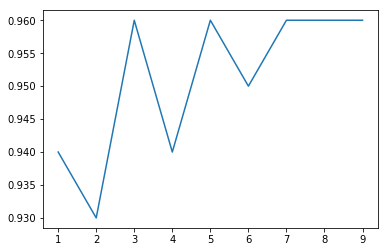

In [102]:
plt.plot(range(1, 10), list_of_accuracy)
plt.show()

Из графика видно, что четные k выбирать не нужно. А при k = 3 мы уже получили оптимальное значение.